In [ ]:
# !pip install requests_html
# !pip install yahoo_fin

     |████████████████████████████████| 92kB 4.1MB/s 
     |████████████████████████████████| 81kB 8.5MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
     |████████████████████████████████| 153kB 49.0MB/s 
  Created wheel for parse: filename=parse-1.19.0-cp37-none-any.whl size=24581 sha256=8586080e07919d4505464f5c7062b6f1dc44544717f38fa8d4d91dfdf3c61da8
  Stored in directory: /root/.cache/pip/wheels/c0/39/ea/e2fd678bd130953f5438470b8dfa529f00787e9b8b92b27467
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=6dc2d31c2742736e43ea0c3562df7da25a8ed4b1133f4fef397ae3d4cda924d2
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
Successfully built parse fake-useragent
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have fol

In [ ]:
# !pip install yfinance

     |████████████████████████████████| 5.5MB 7.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=e4b4fbf7da55ef81406ea2146b6e87083e552611623aef7621460b1d3786820c
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# !pip install mftool

  Created wheel for mftool: filename=mftool-2.0-cp37-none-any.whl size=7313 sha256=dbe5d0931d12bc388a370bd2b4f4ac86b1fa7db912779f20f4e5cf226e7172a9
  Stored in directory: /root/.cache/pip/wheels/ed/04/96/e7c48f89d4b564b054efbc253b17821ae7a8e39ca3ab07488b
Successfully built mftool


In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
import utils as utils

In [3]:
def stock_data(symbol,time_period,time_interval):
    stock = pd.DataFrame(yf.download(symbol,period = time_period,interval = time_interval))
    stock.index = pd.to_datetime(stock.index, format="%Y%m").to_period('M')
    return stock


In [4]:
mf_list = ["0P0000XUZ6.BO", "0P0000XWAT.BO", "0P0000XWAK.BO","0P0000XW00.BO"]

In [ ]:
data = yf.Ticker.get_info(mf_list[0])
data

In [ ]:

# stocks = pd.DataFrame(yf.download(stock_list,period = '15y',interval = '1mo'))
mf = stock_data(mf_list, '5y', '1mo')
mf = mf['Close']
mf.columns = ['icTech','icBChip','icBA','crEE']
mf.head(10)

[*********************100%***********************]  4 of 4 completed


,icTech,icBChip,icBA,crEE
Date,,,,
2018-01,53.480000,101.139999,35.490002,43.680000
2018-02,54.189999,99.070000,35.240002,41.820000
2018-03,52.680000,95.110001,35.189999,40.480000
2018-04,57.189999,102.449997,35.930000,42.529999
2018-05,56.830002,99.019997,35.849998,42.349998
2018-06,57.779999,96.309998,35.549999,41.610001
2018-07,60.119999,101.910004,36.250000,43.820000
2018-08,63.639999,105.489998,36.689999,45.630001
2018-09,64.370003,93.529999,35.730000,42.650002


In [ ]:
mf.tail(10)

,icTech,icBChip,icBA,crEE
Date,,,,
2020-07,72.459999,101.349998,39.950001,43.060001
2020-08,76.459999,107.150002,41.160000,44.590000
2020-09,85.949997,108.269997,40.939999,43.580002
2020-10,88.029999,110.220001,41.599998,44.740002
2020-11,93.370003,123.900002,44.410000,49.840000
2020-12,105.230003,131.149994,46.139999,53.970001
2021-01,105.860001,128.970001,45.889999,53.439999
2021-02,108.839996,140.009995,47.990002,57.410000
2021-03,116.400002,141.059998,48.040001,57.419998


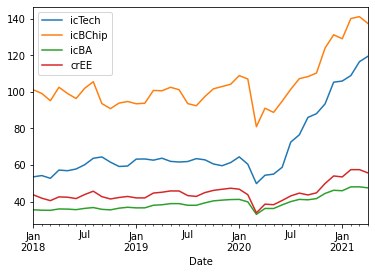

In [ ]:
mf.plot()

In [ ]:
mf.isna().count()

icTech     40
icBChip    40
icBA       40
crEE       40
dtype: int64

In [ ]:
mf.count()

icTech     40
icBChip    40
icBA       40
crEE       40
dtype: int64

In [ ]:
def all_returns(data: pd.DataFrame):
    returns = data.pct_change()
    returns = returns.dropna()
    returns_prod = (1+returns).prod(axis = 0)
    # daily_returns = returns_prod**(1/len(returns)) -1
    monthly_returns = returns_prod**(1/len(returns)) -1
    annual_returns = returns_prod**(12/len(returns)) -1
    annual_vol = returns.std()*(12**0.5)
    return returns,monthly_returns,annual_returns, annual_vol

In [ ]:
r,mr,ar,av = all_returns(mf)

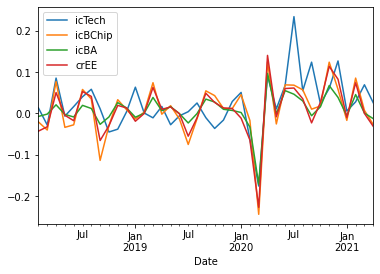

In [ ]:
r.plot()

In [ ]:
ar

icTech     0.280411
icBChip    0.098615
icBA       0.093405
crEE       0.077248
dtype: float64

In [ ]:
av

icTech     0.221891
icBChip    0.225526
icBA       0.136709
crEE       0.207650
dtype: float64

In [ ]:
def sharp_ratio(annual_returns, annual_vol, riskfree_rate):
    return (annual_returns - riskfree_rate)/annual_vol

In [ ]:
sharp_ratio(ar,av,0.03)                                                 

icTech     1.128534
icBChip    0.304244
icBA       0.463797
crEE       0.227538
dtype: float64

In [ ]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()   
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [ ]:
drawdown_tech = drawdown(r['icTech'])
drawdown_icBChip = drawdown(r['icBChip'])
drawdown_icBA = drawdown(r['icBA'])
drawdown_crEE = drawdown(r['crEE'])

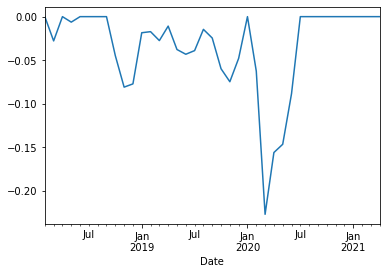

In [ ]:
drawdown_tech = drawdown(r['icTech'])
drawdown_tech["Drawdown"].plot()

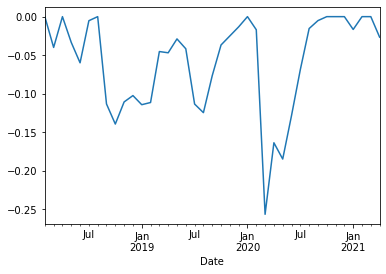

In [ ]:
drawdown_icBChip = drawdown(r['icBChip'])
drawdown_icBChip["Drawdown"].plot()

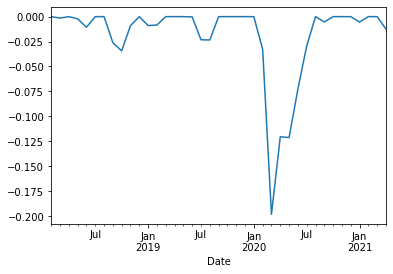

In [ ]:
drawdown_icBA = drawdown(r['icBA'])
drawdown_icBA["Drawdown"].plot()

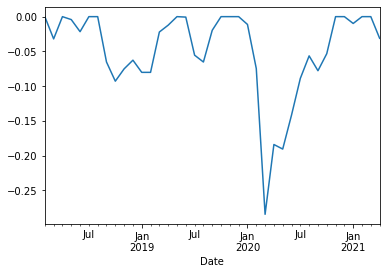

In [ ]:
drawdown_crEE = drawdown(r['crEE'])
drawdown_crEE["Drawdown"].plot()

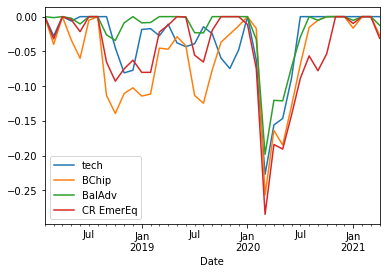

In [ ]:
draw_down = pd.DataFrame({'tech':drawdown_tech['Drawdown'],'BChip':drawdown_icBChip['Drawdown'],'BalAdv':drawdown_icBA['Drawdown'],'CR EmerEq':drawdown_crEE['Drawdown']})
draw_down.plot()

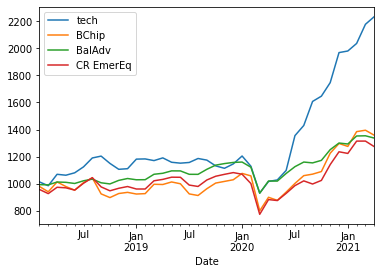

In [ ]:
wealth = pd.DataFrame({'tech':drawdown_tech['Wealth'],'BChip':drawdown_icBChip['Wealth'],'BalAdv':drawdown_icBA['Wealth'],'CR EmerEq':drawdown_crEE['Wealth']})
wealth.plot()

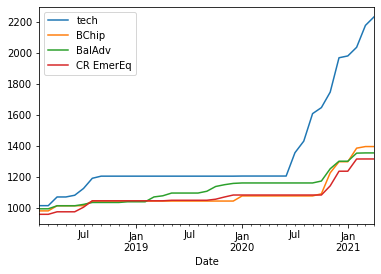

In [ ]:
prev_peak = pd.DataFrame({'tech':drawdown_tech['Previous Peak'],'BChip':drawdown_icBChip['Previous Peak'],'BalAdv':drawdown_icBA['Previous Peak'],'CR EmerEq':drawdown_crEE['Previous Peak']})
prev_peak.plot()

In [ ]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [ ]:
semideviation(r)

icTech     0.044560
icBChip    0.057908
icBA       0.040218
crEE       0.051041
dtype: float64

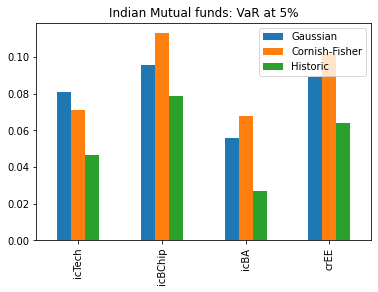

In [ ]:
var_table = [erk.var_gaussian(r), 
             erk.var_gaussian(r, modified=True), 
             erk.var_historic(r)]
comparison = pd.concat(var_table, axis=1)
comparison.columns=['Gaussian', 'Cornish-Fisher', 'Historic']
comparison.plot.bar(title="Indian Mutual funds: VaR at 5%")

In [ ]:
er = ar
cov = r.cov()
cov

,icTech,icBChip,icBA,crEE
icTech,0.004103,0.002549,0.001563,0.002390
icBChip,0.002549,0.004238,0.002409,0.003721
icBA,0.001563,0.002409,0.001557,0.002294
crEE,0.002390,0.003721,0.002294,0.003593


In [ ]:
r.corr()

,icTech,icBChip,icBA,crEE
icTech,1.000000,0.611189,0.618493,0.622446
icBChip,0.611189,1.000000,0.937534,0.953490
icBA,0.618493,0.937534,1.000000,0.969659
crEE,0.622446,0.953490,0.969659,1.000000


In [ ]:
n_points = 100
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]

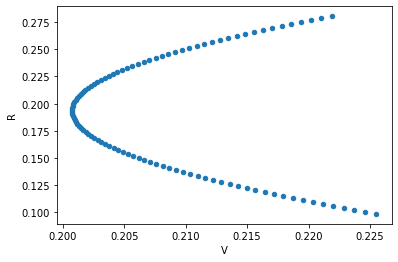

In [ ]:
l = ["icTech", "icBChip"]
rets = [erk.portfolio_return(w, er[l]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[l,l])*(12**0.5) for w in weights]
ef = pd.DataFrame({"R": rets, "V": vols})
ax = ef.plot.scatter(x="V", y="R")

In [ ]:
pv = min(vols)
pv

0.20075014346726627

In [ ]:
pr = rets[vols.index(pv)]
pr

0.19410373760380262

In [ ]:
er[l]

icTech     0.280411
icBChip    0.098615
dtype: float64

In [ ]:
w = (pr-min(er[l]))/(max(er[l]) - min(er[l]))
w

0.5252525252525254

In [ ]:
ew = np.repeat(0.25, 4)
pr = erk.portfolio_return(ew, ar)
pr

0.13741983246839107

In [ ]:
pv = erk.portfolio_vol(ew,cov)
pv

0.05204792463352649

[0.00000000e+00 1.85129689e-14 1.00000000e+00 8.74300632e-15]


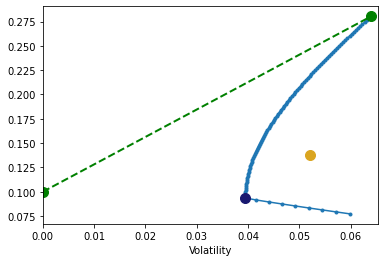

In [ ]:
msr,ew,gmv = erk.plot_ef(100, er, cov, show_cml=True, riskfree_rate=0.1, show_ew=True, show_gmv=True)


In [ ]:
msr

array([1.00000000e+00, 1.22124533e-15, 0.00000000e+00, 7.77156117e-16])

In [ ]:
ew

array([0.25, 0.25, 0.25, 0.25])

In [ ]:
gmv

array([0.00000000e+00, 1.85129689e-14, 1.00000000e+00, 8.74300632e-15])

In [ ]:
pr = erk.portfolio_return(gmv,ar)
pr

0.09340516842420817

In [ ]:
pv = erk.portfolio_vol(gmv,cov)*(12**0.5)
pv

0.13670880830148982

In [ ]:
sharp_ratio(pr,pv,0.03)

0.4637972432937753

In [ ]:
from mftool import Mftool
mf = Mftool()

In [ ]:
codes = mf.get_scheme_codes()


In [ ]:
df = pd.DataFrame({'Code':codes.values(), 'SchemeNames': codes.keys()})

In [ ]:
df.to_csv('mf_india_codes.csv',index =False)

In [ ]:
df2 = pd.read_csv('mf_india_codes.csv',index_col=0)
df2.head()

,SchemeNames
Code,
Aditya Birla Sun Life Banking & PSU Debt Fund - DIRECT - IDCW,119551
Aditya Birla Sun Life Banking & PSU Debt Fund - DIRECT - MONTHLY IDCW,119552
Aditya Birla Sun Life Banking & PSU Debt Fund - Direct - Quarterly IDCW,119553
Aditya Birla Sun Life Banking & PSU Debt Fund - REGULAR - IDCW,108272
Aditya Birla Sun Life Banking & PSU Debt Fund - REGULAR - MONTHLY IDCW,110282


In [ ]:
det1 = mf.get_scheme_details(df2.iloc[0,0])
det1

{'fund_house': 'Aditya Birla Sun Life Mutual Fund',
 'scheme_category': 'Debt Scheme - Banking and PSU Fund',
 'scheme_code': 119551,
 'scheme_name': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - IDCW',
 'scheme_start_date': {'date': '02-01-2013', 'nav': '103.00590'},
 'scheme_type': 'Open Ended Schemes'}

In [ ]:
qt1 = mf.get_scheme_quote(df2.iloc[0,0])

In [ ]:
qt1

{'last_updated': '12-Apr-2021',
 'nav': '153.3259',
 'scheme_code': '119551',
 'scheme_name': 'Aditya Birla Sun Life Banking & PSU Debt Fund  - DIRECT - IDCW'}

In [ ]:
mf.get_scheme_historical_nav(df2.iloc[0,0])

{'data': [{'date': '12-04-2021', 'nav': '153.32590'},
  {'date': '09-04-2021', 'nav': '153.26090'},
  {'date': '08-04-2021', 'nav': '153.16970'},
  {'date': '07-04-2021', 'nav': '153.14540'},
  {'date': '06-04-2021', 'nav': '153.21010'},
  {'date': '05-04-2021', 'nav': '153.00690'},
  {'date': '31-03-2021', 'nav': '152.74570'},
  {'date': '30-03-2021', 'nav': '152.65790'},
  {'date': '26-03-2021', 'nav': '152.53440'},
  {'date': '25-03-2021', 'nav': '152.45140'},
  {'date': '24-03-2021', 'nav': '152.38470'},
  {'date': '23-03-2021', 'nav': '152.22430'},
  {'date': '22-03-2021', 'nav': '151.84790'},
  {'date': '19-03-2021', 'nav': '151.63870'},
  {'date': '18-03-2021', 'nav': '151.39010'},
  {'date': '17-03-2021', 'nav': '151.34730'},
  {'date': '16-03-2021', 'nav': '151.31720'},
  {'date': '15-03-2021', 'nav': '151.33810'},
  {'date': '12-03-2021', 'nav': '151.63230'},
  {'date': '10-03-2021', 'nav': '151.71200'},
  {'date': '09-03-2021', 'nav': '151.71480'},
  {'date': '08-03-2021', '

In [ ]:
symbol = df2.index[0]

In [ ]:
# !pip install get-all-tickers


In [ ]:
# from get_all_tickers import get_tickers as gt
# from get_all_tickers.get_tickers import Region
# tickers_india = gt.get_tickers_by_region(Region.ASIA)
# list_of_tickers = gt.get_tickers()
# or if you want to save them to a CSV file
# get.save_tickers()

In [ ]:
# gt.save_tickers_by_region(Region.ASIA, filename='tickers_by_region.csv')

In [ ]:
import yahoo_fin

In [ ]:
from yahoo_fin import stock_info

In [ ]:
# import urllib2, urllib, json

# baseurl = "https://query.yahooapis.com/v1/public/yql?"
# yql_query = "select wind from weather.forecast where woeid=2460286"
# yql_url = baseurl + urllib.urlencode({'q':yql_query}) + "&format=json"
# result = urllib2.urlopen(yql_url).read()
# data = json.loads(result)

# print(data['query']['results'])

In [ ]:
# !pip install unirest

In [ ]:
# import unirest
# response = unirest.post(API_URL,
#   headers={
#     "X-RapidAPI-Key": API_KEY,
#     "Content-Type": "application/x-www-form-urlencoded"
#   },
#   params={
#     "parameter": "value"
#   }
# )
# response.code # The HTTP status code
# response.headers # The HTTP headers
# response.body # The parsed response
# response.raw_body # The unparsed response

In [ ]:
# import requests

In [ ]:
# baseurl = "https://query.yahooapis.com/v1/public/yql?"
# yql_query = "select wind from weather.forecast where woeid=2460286"
# ploads = {'q':yql_query}
# r = requests.get(baseurl,params=ploads)


In [ ]:
mfsin = pd.read_csv('/content/top500.csv')

In [ ]:
mfsin.head()

,Symbol,Current Price,Date,Time,Change,Open,High,Low,Volume,Trade Date,Purchase Price,Quantity,Commission,High Limit,Low Limit,Comment
0,0P00005V30.BO,16.5680,2021/04/09,01:30 IST,0.021000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0P0000XVYN.BO,19.5930,2021/04/09,01:30 IST,0.025000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0P0000XW5N.BO,74.8429,2021/04/09,01:30 IST,0.095901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0P0000XW5M.BO,31.1214,2021/04/09,01:30 IST,0.039902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0P0000XVYO.BO,69.0240,2021/04/09,01:30 IST,0.089005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
testSymbol = "0P00005V30.BO" #mfsin.iloc[0,0]

In [ ]:
def fetchMFData(testSymbol):
    stats = pd.DataFrame.from_dict(stock_info.get_stats(testSymbol))
    stats.set_index('Attribute',inplace=True)
    quote = pd.DataFrame.from_dict(stock_info.get_quote_data(testSymbol),orient ='index',columns = ['Value'])
    quoteTable = pd.DataFrame.from_dict(stock_info.get_quote_table(testSymbol),orient ='index',columns = ['Value'])
    analystReport = stock_info.get_analysts_info(testSymbol)
    assetReport = analystReport['Net Assets']
    assetReport.columns = ['Attribute','Value']
    assetReport.set_index('Attribute',inplace=True)
    prevCloseReport = analystReport['Previous Close']
    prevCloseReport.columns = ['Attribute','Value']
    prevCloseReport.set_index('Attribute',inplace=True)
    allData = pd.concat([stats,quote,quoteTable,assetReport,prevCloseReport], axis =0)
    allData.columns = [testSymbol]
    return allData.drop_duplicates()

In [ ]:
def fetchAllMFData(testSymbols):
    data = fetchMFData(testSymbols[0])
    for symbol in testSymbols[1:]:
        data = data.join(fetchMFData(symbol))
    return pd.DataFrame.transpose(data)


In [ ]:
trialData = fetchAllMFData(mfsin['Symbol'][:50])

HTTPError: ignored

In [ ]:
actualData

,Net Assets,Beta (5Y Monthly),Yield,5y Average Return,Holdings Turnover,Last Dividend,Average for Category,Inception Date,language,region,quoteType,quoteSourceName,triggerable,currency,firstTradeDateMilliseconds,priceHint,regularMarketChange,regularMarketChangePercent,regularMarketTime,regularMarketPrice,regularMarketPreviousClose,fullExchangeName,averageDailyVolume3Month,averageDailyVolume10Day,fiftyTwoWeekLowChange,fiftyTwoWeekLowChangePercent,fiftyTwoWeekRange,fiftyTwoWeekHighChange,fiftyTwoWeekHighChangePercent,fiftyTwoWeekLow,fiftyTwoWeekHigh,ytdReturn,trailingThreeMonthReturns,fiftyDayAverage,fiftyDayAverageChange,fiftyDayAverageChangePercent,exchange,shortName,longName,exchangeTimezoneName,...,esgPopulated,marketState,twoHundredDayAverage,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,sourceInterval,exchangeDataDelayedBy,tradeable,symbol,5y Average Return,Average for Category,Beta (5Y Monthly),Category,Expense Ratio (net),Holdings Turnover,Inception Date,Last Cap Gain,Last Dividend,Morningstar Rating,Morningstar Risk Rating,Net Assets,Previous Close,Quote Price,Sustainability Rating,YTD Return,Yield,Beta (5Y Monthly),Yield,5y Average Return,Holdings Turnover,Last Dividend,Average for Category,Inception Date,YTD Return,Expense Ratio (net),Category,Last Cap Gain,Morningstar Rating,Morningstar Risk Rating,Sustainability Rating
0P00005V30.BO,125.05M,0.96,8.89%,NaN,67.02%,0.07,NaN,"Sep 15, 2005",en-US,US,MUTUALFUND,Delayed Quote,False,INR,1514778300000,2,-0.675001,-4.07413,1618257600,15.893,16.568,BSE,0,0,6.353,0.665933,9.54 - 16.506,-0.613001,-0.0371381,9.54,16.506,8.99,8.35,16.4291,-0.53606,-0.0326288,BSE,BNP Paribas Multi Cap FundPayou,BNP Paribas Multi Cap Fund Dividend Payout,Asia/Kolkata,...,False,POSTPOST,15.0144,0.878634,0.0585196,10,0,False,0P00005V30.BO,NaN,NaN,0.96,Flexicap,2.50%,67.02%,"Sep 15, 2005",0,0.07,★★★★★,Below Average,125.05M,13.44,NaN,NaN,8.99%,8.89%,0.96,8.89%,NaN,67.02%,0.07,NaN,"Sep 15, 2005",8.99%,2.50%,Flexicap,0.00,★★★★★,Below Average,NaN
0P0000XVYN.BO,125.05M,0.96,8.89%,NaN,67.02%,0.07,NaN,"Sep 15, 2005",en-US,US,MUTUALFUND,Delayed Quote,False,INR,1514778300000,2,-0.675001,-4.07413,1618257600,15.893,16.568,BSE,0,0,6.353,0.665933,9.54 - 16.506,-0.613001,-0.0371381,9.54,16.506,8.99,8.35,16.4291,-0.53606,-0.0326288,BSE,BNP Paribas Multi Cap FundPayou,BNP Paribas Multi Cap Fund Dividend Payout,Asia/Kolkata,...,False,POSTPOST,15.0144,0.878634,0.0585196,10,0,False,0P00005V30.BO,NaN,NaN,0.96,Flexicap,0.85%,67.02%,"Jan 01, 2013",0,0.07,★★★★★,Average,125.05M,15.74,NaN,NaN,10.66%,7.73%,0.96,7.73%,NaN,67.02%,0.07,NaN,"Jan 01, 2013",10.66%,0.85%,Flexicap,0.00,★★★★★,Average,NaN
0P0000XW5N.BO,125.05M,0.96,8.89%,NaN,67.02%,0.07,NaN,"Sep 15, 2005",en-US,US,MUTUALFUND,Delayed Quote,False,INR,1514778300000,2,-0.675001,-4.07413,1618257600,15.893,16.568,BSE,0,0,6.353,0.665933,9.54 - 16.506,-0.613001,-0.0371381,9.54,16.506,8.99,8.35,16.4291,-0.53606,-0.0326288,BSE,BNP Paribas Multi Cap FundPayou,BNP Paribas Multi Cap Fund Dividend Payout,Asia/Kolkata,...,False,POSTPOST,15.0144,0.878634,0.0585196,10,0,False,0P00005V30.BO,NaN,NaN,0.72,NaN,0.96%,11.95%,"Jan 01, 2013",NaN,NaN,★★★★★,Below Average,8.37B,53.77,NaN,NaN,-4.63%,0.00%,0.72,0.00%,NaN,11.95%,NaN,NaN,"Jan 01, 2013",-4.63%,0.96%,NaN,NaN,★★★★★,Below Average,NaN
0P0000XW5M.BO,125.05M,0.96,8.89%,NaN,67.02%,0.07,NaN,"Sep 15, 2005",en-US,US,MUTUALFUND,Delayed Quote,False,INR,1514778300000,2,-0.675001,-4.07413,1618257600,15.893,16.568,BSE,0,0,6.353,0.665933,9.54 - 16.506,-0.613001,-0.0371381,9.54,16.506,8.99,8.35,16.4291,-0.53606,-0.0326288,BSE,BNP Paribas Multi Cap FundPayou,BNP Paribas Multi Cap Fund Dividend Payout,Asia/Kolkata,...,False,POSTPOST,15.0144,0.878634,0.0585196,10,0,False,0P00005V30.BO,NaN,NaN,0.72,NaN,0.96%,11.95%,"Jan 01, 2013",0,2,★★★★★,Average,8.37B,23.34,NaN,NaN,-4.63%,8.07%,0.72,8.07%,NaN,11.95%,2.00,NaN,"Jan 01, 2013",-4.63%,0.96%,NaN,0.00,★★★★★,Average,NaN
0P0000XVYO.BO,125.05M,0.96,8.89%,NaN,67.02%,0.07,NaN,"Sep 15, 2005",en-US,US,MU

In [ ]:
testSymbols = ['0P00005V30.BO', '0P0000XVYN.BO','0P0000XW5N.BO']

# for symbol in testSymbols:
ticker = yf.Ticker(testSymbols[0])
pd.DataFrame.from_dict(ticker.get_info(),orient ='index')

,0
previousClose,15.893
regularMarketOpen,None
twoHundredDayAverage,15.0335
trailingAnnualDividendYield,None
payoutRatio,None
...,...
address3,"Bandra Kurla Complex, Bandra (E)"
longBusinessSummary,The investment objective is to generate long t...
companyOfficers,[]
regularMarketPrice,16.039


In [ ]:
def fetchMFDataYF(testSymbol):
    
    info = pd.DataFrame.from_dict(yf.Ticker(testSymbol[0]).get_info(),orient ='index')
    info.columns = [testSymbol[0]]
    for symbol in testSymbol[1:]:
        nextInfo =pd.DataFrame.from_dict(yf.Ticker(symbol).get_info(),orient ='index')
        nextInfo.columns = [symbol]
        info = info.join(nextInfo)
    
    return pd.DataFrame.transpose(info)


In [ ]:
actualData = fetchMFDataYF(mfsin['Symbol'][:50])

In [ ]:
actualData

,previousClose,regularMarketOpen,twoHundredDayAverage,trailingAnnualDividendYield,payoutRatio,volume24Hr,regularMarketDayHigh,navPrice,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,trailingAnnualDividendRate,open,toCurrency,averageVolume10days,expireDate,yield,algorithm,dividendRate,exDividendDate,beta,circulatingSupply,startDate,regularMarketDayLow,priceHint,currency,regularMarketVolume,lastMarket,maxSupply,openInterest,marketCap,volumeAllCurrencies,strikePrice,averageVolume,priceToSalesTrailing12Months,dayLow,ask,ytdReturn,askSize,...,annualHoldingsTurnover,enterpriseToRevenue,beta3Year,profitMargins,enterpriseToEbitda,52WeekChange,morningStarRiskRating,forwardEps,revenueQuarterlyGrowth,fundInceptionDate,annualReportExpenseRatio,bookValue,fundFamily,lastFiscalYearEnd,netIncomeToCommon,trailingEps,lastDividendValue,SandP52WeekChange,priceToBook,nextFiscalYearEnd,mostRecentQuarter,enterpriseValue,threeYearAverageReturn,lastSplitDate,lastSplitFactor,legalType,lastDividendDate,morningStarOverallRating,earningsQuarterlyGrowth,pegRatio,lastCapGain,category,fiveYearAverageReturn,address1,address2,address3,longBusinessSummary,companyOfficers,regularMarketPrice,logo_url
0P00005V30.BO,15.893,None,15.0335,None,None,None,None,None,0,125045000,15.893,16.4375,None,None,None,0,None,0.0889,None,None,None,None,None,None,None,2,INR,None,None,None,None,None,None,None,0,None,None,None,0.0899,None,...,0.6702,None,0.96,None,None,None,2,None,None,1126742400,0.025,None,None,None,None,None,0.07,None,None,None,None,None,None,None,None,None,None,3,None,None,0,None,None,BNP Paribas Asset Management India Private Lim...,"BNP Paribas House, 1, North Avenue, Maker Maxity,","Bandra Kurla Complex, Bandra (E)",The investment objective is to generate long t...,[],16.039,
0P0000XVYN.BO,18.797,None,17.6768,None,None,None,None,None,0,125045000,18.797,19.4142,None,None,None,0,None,0.0773,None,None,None,None,None,None,None,2,INR,None,None,None,None,None,None,None,0,None,None,None,0.1066,None,...,0.6702,None,0.96,None,None,None,3,None,None,1356998400,0.0085,None,None,None,None,None,0.07,None,None,None,None,None,None,None,None,None,None,3,None,None,0,None,None,BNP Paribas Asset Management India Private Lim...,"BNP Paribas House, 1, North Avenue, Maker Maxity,","Bandra Kurla Complex, Bandra (E)",The investment objective is to generate long t...,[],18.971,
0P0000XW5N.BO,71.2864,None,63.8381,None,None,None,None,None,0,8373905920,71.2864,73.6394,None,None,None,0,None,0,None,None,None,None,None,None,None,2,INR,None,None,None,None,None,None,None,0,None,None,None,-0.0463,None,...,0.1195,None,0.72,None,None,None,2,None,None,1356998400,0.0096,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,3,None,None,None,None,None,Franklin Templeton Asset Management (India) Pr...,"Indiabulls Finance Centre; Tower 2, 12th and 13th",Senapati Bapat Marg;,The Fund seeks to provide long-term capital ap...,[],72.4933,
0P0000XW5M.BO,29.6425,None,27.3795,None,None,None,None,None,0,8373905920,29.6425,30.6209,None,None,None,0,None,0.0807,None,None,None,None,None,None,None,2,INR,None,None,None,None,None,None,None,0,None,None,None,-0.0463,None,...,0.1195,None,0.72,None,None,None,3,None,None,1356998400,0.0096,None,None,None,None,None,2,None,None,None,None,None,None,None,None,None,None,3,None,None,0,None,None,Franklin Templeton Asset Management (India) Pr...,"Indiabulls Finance Centre; Tower 2, 12th and 13th",Senapati Bapat Marg;,The Fund seeks to provide long-term capital ap...,[],30.1444,
0P0000XVYO.BO,66.221,None,61.5375,None,None,None,None,None,0,125045000,66.221,68.2377,None,None,None,0,None,0,None,None,None,None,None,None,None,2,INR,None,None,None,None,None,None,None,0,None,None,None,0.1261,None,...,0.6702,None,0.99,None,None,None,3,None,None,1356998400,0.0085,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,4,None,None,None,None,None,BNP Paribas Asset Management India Private Lim...,"BNP Paribas House,

In [ ]:
i=0
for column in actualData.columns:
    print(actualData.columns[i], ': ',actualData[column].isna().sum())
    i+=1

previousClose :  0
regularMarketOpen :  50
twoHundredDayAverage :  0
trailingAnnualDividendYield :  50
payoutRatio :  50
volume24Hr :  50
regularMarketDayHigh :  50
navPrice :  50
averageDailyVolume10Day :  0
totalAssets :  37
regularMarketPreviousClose :  0
fiftyDayAverage :  0
trailingAnnualDividendRate :  50
open :  50
toCurrency :  50
averageVolume10days :  0
expireDate :  50
yield :  0
algorithm :  50
dividendRate :  50
exDividendDate :  50
beta :  50
circulatingSupply :  50
startDate :  50
regularMarketDayLow :  50
priceHint :  0
currency :  0
regularMarketVolume :  50
lastMarket :  50
maxSupply :  50
openInterest :  50
marketCap :  50
volumeAllCurrencies :  50
strikePrice :  50
averageVolume :  0
priceToSalesTrailing12Months :  50
dayLow :  50
ask :  50
ytdReturn :  0
askSize :  50
volume :  50
fiftyTwoWeekHigh :  0
forwardPE :  50
maxAge :  0
fromCurrency :  50
fiveYearAvgDividendYield :  50
fiftyTwoWeekLow :  0
bid :  50
tradeable :  0
dividendYield :  50
bidSize :  50
dayHigh

In [ ]:
df1 = actualData.dropna(how='all', axis=1)

In [ ]:
i=0
for column in df1.columns:
    print(df1.columns[i], ': ',df1[column].isna().sum())
    i+=1

previousClose :  0
twoHundredDayAverage :  0
averageDailyVolume10Day :  0
totalAssets :  37
regularMarketPreviousClose :  0
fiftyDayAverage :  0
averageVolume10days :  0
yield :  0
priceHint :  0
currency :  0
averageVolume :  0
ytdReturn :  0
fiftyTwoWeekHigh :  0
maxAge :  0
fiftyTwoWeekLow :  0
tradeable :  0
exchange :  0
shortName :  0
longName :  0
exchangeTimezoneName :  0
exchangeTimezoneShortName :  0
isEsgPopulated :  0
gmtOffSetMilliseconds :  0
quoteType :  0
symbol :  0
market :  0
annualHoldingsTurnover :  7
beta3Year :  4
morningStarRiskRating :  0
fundInceptionDate :  0
annualReportExpenseRatio :  0
lastDividendValue :  19
morningStarOverallRating :  0
lastCapGain :  19
address1 :  0
address2 :  1
address3 :  1
longBusinessSummary :  3
companyOfficers :  0
regularMarketPrice :  0
logo_url :  0


In [ ]:
df1.head()

,previousClose,twoHundredDayAverage,averageDailyVolume10Day,totalAssets,regularMarketPreviousClose,fiftyDayAverage,averageVolume10days,yield,priceHint,currency,averageVolume,ytdReturn,fiftyTwoWeekHigh,maxAge,fiftyTwoWeekLow,tradeable,exchange,shortName,longName,exchangeTimezoneName,exchangeTimezoneShortName,isEsgPopulated,gmtOffSetMilliseconds,quoteType,symbol,market,annualHoldingsTurnover,beta3Year,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,lastDividendValue,morningStarOverallRating,lastCapGain,address1,address2,address3,longBusinessSummary,companyOfficers,regularMarketPrice,logo_url
0P00005V30.BO,15.893,15.0335,0,125045000,15.893,16.4375,0,0.0889,2,INR,0,0.0899,16.506,1,9.54,False,BSE,BNP Paribas Multi Cap FundPayou,BNP Paribas Multi Cap Fund Dividend Payout,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P00005V30.BO,in_market,0.6702,0.96,2,1126742400,0.025,0.07,3,0,BNP Paribas Asset Management India Private Lim...,"BNP Paribas House, 1, North Avenue, Maker Maxity,","Bandra Kurla Complex, Bandra (E)",The investment objective is to generate long t...,[],16.039,
0P0000XVYN.BO,18.797,17.6768,0,125045000,18.797,19.4142,0,0.0773,2,INR,0,0.1066,19.456,1,11.04,False,BSE,BNP Paribas Multi Cap Fund Dire,BNP Paribas Multi Cap Fund Direct Plan Dividen...,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0000XVYN.BO,in_market,0.6702,0.96,3,1356998400,0.0085,0.07,3,0,BNP Paribas Asset Management India Private Lim...,"BNP Paribas House, 1, North Avenue, Maker Maxity,","Bandra Kurla Complex, Bandra (E)",The investment objective is to generate long t...,[],18.971,
0P0000XW5N.BO,71.2864,63.8381,0,8373905920,71.2864,73.6394,0,0,2,INR,0,-0.0463,72.4372,1,34.2965,False,BSE,Franklin India Smaller Companie,Franklin India Smaller Companies Fund - Direct...,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0000XW5N.BO,in_market,0.1195,0.72,2,1356998400,0.0096,None,3,None,Franklin Templeton Asset Management (India) Pr...,"Indiabulls Finance Centre; Tower 2, 12th and 13th",Senapati Bapat Marg;,The Fund seeks to provide long-term capital ap...,[],72.4933,
0P0000XW5M.BO,29.6425,27.3795,0,8373905920,29.6425,30.6209,0,0.0807,2,INR,0,-0.0463,31.4465,1,14.8889,False,BSE,Franklin India Smaller Companie,Franklin India Smaller Companies Fund Direct D...,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0000XW5M.BO,in_market,0.1195,0.72,3,1356998400,0.0096,2,3,0,Franklin Templeton Asset Management (India) Pr...,"Indiabulls Finance Centre; Tower 2, 12th and 13th",Senapati Bapat Marg;,The Fund seeks to provide long-term capital ap...,[],30.1444,
0P0000XVYO.BO,66.221,61.5375,0,125045000,66.221,68.2377,0,0,2,INR,0,0.1261,68.043,1,37.213,False,BSE,BNP Paribas Multi Cap Fund Dire,BNP Paribas Multi Cap Fund Direct Plan Growth ...,Asia/Kolkata,IST,False,19800000,MUTUALFUND,0P0000XVYO.BO,in_market,0.6702,0.99,3,1356998400,0.0085,None,4,None,BNP Paribas Asset Management India Private Lim...,"BNP Paribas House, 1, North Avenue, Maker Maxity,","Bandra Kurla Complex, Bandra (E)",The investment objective is to generate long t...,[],66.833,


In [ ]:
df1.columns

Index(['previousClose', 'twoHundredDayAverage', 'averageDailyVolume10Day',
       'totalAssets', 'regularMarketPreviousClose', 'fiftyDayAverage',
       'averageVolume10days', 'yield', 'priceHint', 'currency',
       'averageVolume', 'ytdReturn', 'fiftyTwoWeekHigh', 'maxAge',
       'fiftyTwoWeekLow', 'tradeable', 'exchange', 'shortName', 'longName',
       'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated',
       'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'market',
       'annualHoldingsTurnover', 'beta3Year', 'morningStarRiskRating',
       'fundInceptionDate', 'annualReportExpenseRatio', 'lastDividendValue',
       'morningStarOverallRating', 'lastCapGain', 'address1', 'address2',
       'address3', 'longBusinessSummary', 'companyOfficers',
       'regularMarketPrice', 'logo_url'],
      dtype='object')

In [ ]:
impColumns = ['previousClose', 'twoHundredDayAverage',
       'regularMarketPreviousClose', 'fiftyDayAverage',
       'yield',
       'fiftyTwoWeekHigh',
       'fiftyTwoWeekLow',
       'annualHoldingsTurnover', 'beta3Year', 'morningStarRiskRating',
       'fundInceptionDate', 'annualReportExpenseRatio',
       'morningStarOverallRating', 
       'regularMarketPrice','ytdReturn']

In [ ]:
df2 = df1[impColumns]

In [ ]:
df2

,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,yield,fiftyTwoWeekHigh,fiftyTwoWeekLow,annualHoldingsTurnover,beta3Year,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,morningStarOverallRating,regularMarketPrice,ytdReturn
0P00005V30.BO,15.893,15.0335,15.893,16.4375,0.0889,16.506,9.54,0.6702,0.96,2,1126742400,0.025,3,16.039,0.0899
0P0000XVYN.BO,18.797,17.6768,18.797,19.4142,0.0773,19.456,11.04,0.6702,0.96,3,1356998400,0.0085,3,18.971,0.1066
0P0000XW5N.BO,71.2864,63.8381,71.2864,73.6394,0,72.4372,34.2965,0.1195,0.72,2,1356998400,0.0096,3,72.4933,-0.0463
0P0000XW5M.BO,29.6425,27.3795,29.6425,30.6209,0.0807,31.4465,14.8889,0.1195,0.72,3,1356998400,0.0096,3,30.1444,-0.0463
0P0000XVYO.BO,66.221,61.5375,66.221,68.2377,0,68.043,37.213,0.6702,0.99,3,1356998400,0.0085,4,66.833,0.1261
0P0000XW7S.BO,49.5322,49.1782,49.5322,49.11,0,49.7646,45.3657,1.1186,1.11,3,1356998400,0.0161,4,49.5615,0.0899
0P0000JTF3.BO,14.86,14.1029,14.86,15.0678,0.2248,15.24,9.23,0.8033,1.13,5,1235520000,0.0225,3,14.96,0.1133
0P00015410.BO,15.664,15.552,15.664,15.5304,0,15.7374,14.3464,1.1186,1.11,3,1418860800,0.0161,3,15.6732,0.0899
0P0000XVZQ.BO,36.95,34.8572,36.95,37.4534,0,37.81,20.64,0.8033,1.19,5,1356998400,0.0181,3,37.22,0.1357
0P00014CY5.BO,10.6034,10.5635,10.6034,10.4624,0.0469,10.9017,10.3814,1.7883,0.68,2,1411689600,0.0046,1,10.6197,0.0667


In [ ]:
df2.to_csv('top50.csv')

In [ ]:
top50 = pd.read_csv('top50.csv')

In [ ]:
top50.head()

,Unnamed: 0,previousClose,twoHundredDayAverage,regularMarketPreviousClose,fiftyDayAverage,yield,fiftyTwoWeekHigh,fiftyTwoWeekLow,annualHoldingsTurnover,beta3Year,morningStarRiskRating,fundInceptionDate,annualReportExpenseRatio,morningStarOverallRating,regularMarketPrice,ytdReturn
0,0P00005V30.BO,15.8930,15.033534,15.8930,16.437500,0.0889,16.5060,9.5400,0.6702,0.96,2,1126742400,0.0250,3,16.0390,0.0899
1,0P0000XVYN.BO,18.7970,17.676783,18.7970,19.414156,0.0773,19.4560,11.0400,0.6702,0.96,3,1356998400,0.0085,3,18.9710,0.1066
2,0P0000XW5N.BO,71.2864,63.838097,71.2864,73.639390,0.0000,72.4372,34.2965,0.1195,0.72,2,1356998400,0.0096,3,72.4933,-0.0463
3,0P0000XW5M.BO,29.6425,27.379460,29.6425,30.620913,0.0807,31.4465,14.8889,0.1195,0.72,3,1356998400,0.0096,3,30.1444,-0.0463
4,0P0000XVYO.BO,66.2210,61.537468,66.2210,68.237686,0.0000,68.0430,37.2130,0.6702,0.99,3,1356998400,0.0085,4,66.8330,0.1261


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb36630a110>,
      dtype=object)

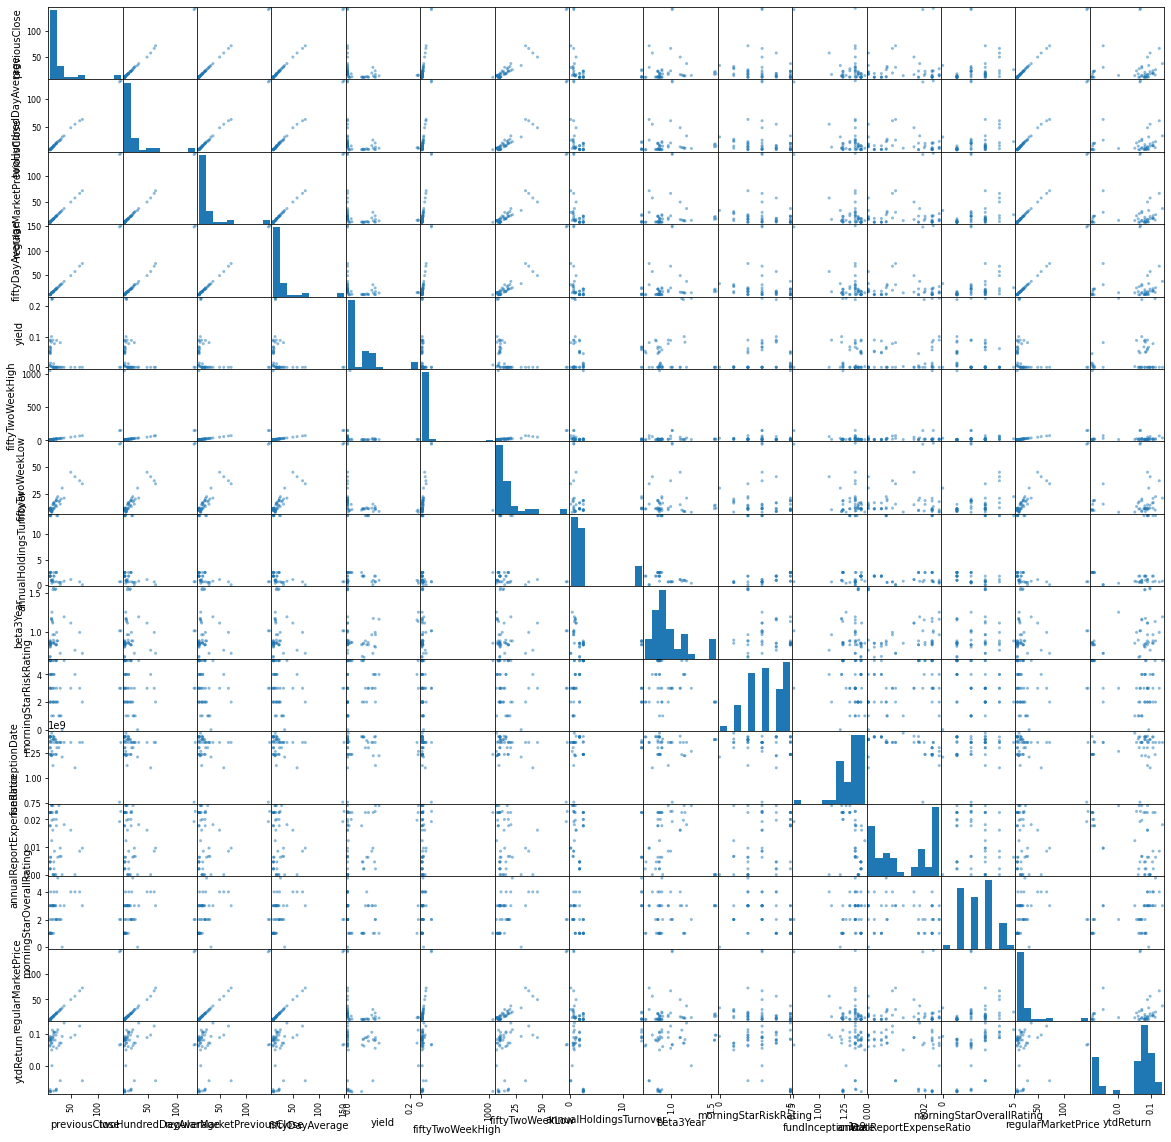

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(top50, figsize=(20,20))[0]

In [ ]:
dataf = stock_info.get_stats(testSymbol)

In [ ]:
df1 = pd.DataFrame.from_dict(dataf)
df1.set_index('Attribute',inplace=True)
df1

,Value
Attribute,
Net Assets,125.05M
Beta (5Y Monthly),0.96
Yield,8.89%
5y Average Return,NaN
Holdings Turnover,67.02%
Last Dividend,0.07
Average for Category,NaN
Inception Date,"Sep 15, 2005"


,0,1
0,Net Assets,125.05M
1,Beta (5Y Monthly),0.96
2,Yield,8.89%
3,5y Average Return,NaN
4,Holdings Turnover,67.02%
5,Last Dividend,0.07
6,Average for Category,NaN
7,Inception Date,"Sep 15, 2005"


In [ ]:
pd.DataFrame.transpose(dataf)

,0,1,2,3,4,5,6,7
Attribute,Net Assets,Beta (5Y Monthly),Yield,5y Average Return,Holdings Turnover,Last Dividend,Average for Category,Inception Date
Value,125.05M,0.96,8.89%,NaN,67.02%,0.07,NaN,"Sep 15, 2005"


In [ ]:
testData = stock_info.get_quote_data(testSymbol)

In [ ]:
dataf2 = pd.DataFrame.from_dict(testData,orient ='index',columns = ['Value'])


In [ ]:
dataf2

,Value
language,en-US
region,US
quoteType,MUTUALFUND
quoteSourceName,Delayed Quote
triggerable,False
currency,INR
firstTradeDateMilliseconds,1514778300000
priceHint,2
regularMarketChange,-0.675001
regularMarketChangePercent,-4.07413


In [ ]:
quoteTable = pd.DataFrame.from_dict(stock_info.get_quote_table(testSymbol),orient ='index',columns = ['Value'])

In [ ]:
df1.shape

(8, 1)

In [ ]:
analystReport = stock_info.get_analysts_info(testSymbol)
analystReport

{'Net Assets':              Net Assets       125.05M
 0     Beta (5Y Monthly)          0.96
 1                 Yield         8.89%
 2     5y Average Return           NaN
 3     Holdings Turnover        67.02%
 4         Last Dividend          0.07
 5  Average for Category           NaN
 6        Inception Date  Sep 15, 2005,
 'Previous Close':             Previous Close          16.57
 0               YTD Return          8.99%
 1      Expense Ratio (net)          2.50%
 2                 Category       Flexicap
 3            Last Cap Gain           0.00
 4       Morningstar Rating          ★★★★★
 5  Morningstar Risk Rating  Below Average
 6    Sustainability Rating            NaN}

In [ ]:
assetReport = analystReport['Net Assets']
assetReport.columns = ['Attribute','Value']
assetReport.set_index('Attribute',inplace=True)
assetReport
# pd.DataFrame.from_dict(,orient ='index',columns = ['Value'])


,Value
Attribute,
Beta (5Y Monthly),0.96
Yield,8.89%
5y Average Return,NaN
Holdings Turnover,67.02%
Last Dividend,0.07
Average for Category,NaN
Inception Date,"Sep 15, 2005"


In [ ]:
prevCloseReport = analystReport['Previous Close']
prevCloseReport.columns = ['Attribute','Value']
prevCloseReport.set_index('Attribute',inplace=True)
prevCloseReport

,Value
Attribute,
YTD Return,8.99%
Expense Ratio (net),2.50%
Category,Flexicap
Last Cap Gain,0.00
Morningstar Rating,★★★★★
Morningstar Risk Rating,Below Average
Sustainability Rating,NaN


In [ ]:
mergeddf = pd.concat([df1,dataf2,quoteTable,assetReport,prevCloseReport], axis =0)
mergeddf

,Value
Net Assets,125.05M
Beta (5Y Monthly),0.96
Yield,8.89%
5y Average Return,NaN
Holdings Turnover,67.02%
...,...
Category,Flexicap
Last Cap Gain,0.00
Morningstar Rating,★★★★★
Morningstar Risk Rating,Below Average


In [ ]:
mergeddf.columns = [testSymbol]
mergeddf

,0P00005V30.BO
Net Assets,125.05M
Beta (5Y Monthly),0.96
Yield,8.89%
5y Average Return,NaN
Holdings Turnover,67.02%
...,...
Category,Flexicap
Last Cap Gain,0.00
Morningstar Rating,★★★★★
Morningstar Risk Rating,Below Average


In [ ]:
testdf = fetchMFData(testSymbol)

In [ ]:
mergeddf.equals(testdf)

True

In [ ]:
# stock_info.get_undervalued_large_caps()

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,VIAC,ViacomCBS Inc.,40.950,1.180,+2.97%,14.13M,37.671M,25.944B,NaN,NaN
1,VALE,Vale S.A.,18.190,0.100,+0.58%,5.412M,28.303M,93.339B,19.86,NaN
2,GOLD,Barrick Gold Corporation,20.990,0.000,0.00%,11.426M,18.876M,37.39B,16.06,NaN
3,GM,General Motors Company,58.350,-1.310,-2.20%,7.072M,25.012M,84.077B,13.48,NaN
4,RKT,"Rocket Companies, Inc.",22.930,0.760,+3.44%,3.767M,23.739M,45.509B,NaN,NaN
5,HPQ,HP Inc.,32.600,-0.150,-0.44%,3.638M,10.421M,40.633B,13.86,NaN
6,KEY,KeyCorp,20.520,-0.320,-1.54%,2.585M,9.31M,19.7B,16.11,NaN
7,PPL,PPL Corporation,28.650,-0.080,-0.28%,2.703M,5.124M,22.044B,15.00,NaN
8,EBAY,eBay Inc.,63.260,0.620,+0.99%,1.533M,7.482M,43.045B,8.02,NaN
9,NEM,Newmont Corporation,61.640,1.030,+1.70%,1.856M,7.217M,49.38B,17.55,NaN


In [ ]:
testData.get_balance_sheet()

In [ ]:
testData.get_balancesheet()

In [ ]:
testData.get_calendar()

In [ ]:
testData.get_cashflow()

In [ ]:
testData.history(period = '5y',interval='1mo')['Close']